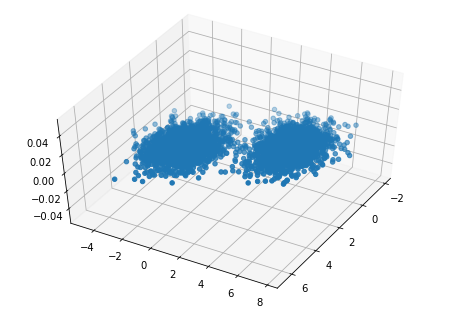

In [2]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
%matplotlib inline

#BLOB NEURAL NET 
#WITH 2 LAYERS OF SIGMOID NEURONS 
features = 5
training_samples = 5000
max_iter = 6000
ls_cost_mse = np.zeros(max_iter)

Xmother, ymother = make_blobs(n_samples = training_samples, centers = 2, n_features = features, random_state = 0 )
X, X_test, y, y_test = train_test_split(Xmother, ymother, test_size=0.25, random_state=42)

Y = y.reshape(len(y),1) #RESHAPE INTO COLUMN VECTOR

fig, ax = plt.subplots()
colors = ("red", "green")
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1], marker='o' )
#ROTATE THE AXES AND DISPLAY
ax.view_init(50, 30)
plt.show()

In [3]:
def nonlin(x, deriv=False):
    if( deriv == True ):
        x*(1-x) #SIGMOID'S DERIVATIVE
    return 1.0/(1.0 + np.exp(-x)) #SIGMOID

In [4]:
l0 = X #INPUT LAYER

num_l1_neurons = 3 # NUMBER OF NEURONS IN SECOND LAYER // CHANGE TO 6 NEURONS TO OVERTRAIN IT
np.random.seed(1) 
#INITIALIZE WEIGHTS AT EACH LAYER
syn0 = 2.0*np.random.random((features,num_l1_neurons)) - 1 #INITIALIZE WEIGHTS FOR INPUT LAYER 1
syn1 = 2.0*np.random.random((num_l1_neurons,1)) - 1 #INITIALIZE WEIGHTS FOR LAYER 2

#ADJUST LEARNING RATE
learning_rate = 0.00001

In [5]:
for iter in xrange(max_iter):
    
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    #print l1
        
    l2_error = Y - l2
    l2_delta = 0.5 * l2_error * nonlin(l2,True)
    
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = 0.5 * l1_error * nonlin(l1,True)

    
    syn0 += learning_rate*np.dot(l0.T,l1_delta)
    syn1 += learning_rate*np.dot(l1.T,l2_delta)
    
    
    cost_mse = 0.5 * np.average(l2_error**2)
    ls_cost_mse[iter] = cost_mse        

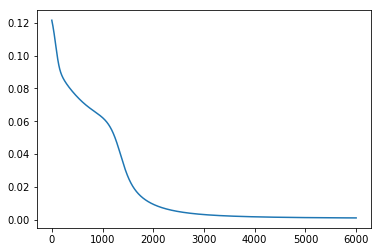

In [6]:
plt.plot(ls_cost_mse)

/Users/bclary/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


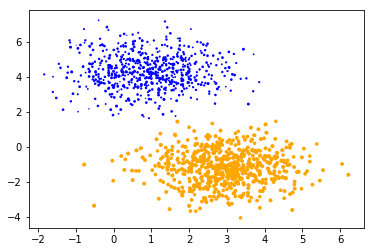

In [7]:
#APPLY NN TO TESTING DATA
Z1 = np.dot(X_test,syn0)
L1 = nonlin(Z1)
Z2 = np.dot(L1,syn1)
y_pred = nonlin(Z2).round()

colors = ['blue','orange']
plt.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_pred, cmap=mplt.colors.ListedColormap(colors))
plt.show()